In [1]:
import pandas as pd
import numpy as np

# --- 1. 데이터 불러오기 및 기본 전처리 ---
df = pd.read_csv('Location1.csv')
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df.rename(columns={'Power': 'target'}, inplace=True)


# --- 2. 특성 공학 (Feature Engineering) ---
print("--- 원본 데이터 Shape:", df.shape)
print("특성 공학을 시작합니다...")

# 기본 시간 특성 생성
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek # 0:월요일, 6:일요일
df['month'] = df.index.month
df['year'] = df.index.year

# 주기성을 가지는 특성 생성 (Cyclical Features)
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24.0)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12.0)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12.0)

print("--- 새로운 특성 추가 후 Shape:", df.shape)


# --- 3. 결과 확인 ---
print("\n새로운 특성이 추가된 데이터 정보:")
print(df.info())

print("\n데이터 샘플 확인:")
df.head()

--- 원본 데이터 Shape: (43800, 9)
특성 공학을 시작합니다...
--- 새로운 특성 추가 후 Shape: (43800, 17)

새로운 특성이 추가된 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2017-01-02 00:00:00 to 2021-12-31 23:00:00
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_2m       43800 non-null  float64
 1   relativehumidity_2m  43800 non-null  int64  
 2   dewpoint_2m          43800 non-null  float64
 3   windspeed_10m        43800 non-null  float64
 4   windspeed_100m       43800 non-null  float64
 5   winddirection_10m    43800 non-null  int64  
 6   winddirection_100m   43800 non-null  int64  
 7   windgusts_10m        43800 non-null  float64
 8   target               43800 non-null  float64
 9   hour                 43800 non-null  int32  
 10  dayofweek            43800 non-null  int32  
 11  month                43800 non-null  int32  
 12  year                 43800 non-null  int32  
 13  

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,target,hour,dayofweek,month,year,hour_sin,hour_cos,month_sin,month_cos
Time,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,1,2017,0.000000,1.000000,0.5,0.866025
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,1,0,1,2017,0.258819,0.965926,0.5,0.866025
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,2,0,1,2017,0.500000,0.866025,0.5,0.866025
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,3,0,1,2017,0.707107,0.707107,0.5,0.866025
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,4,0,1,2017,0.866025,0.500000,0.5,0.866025


In [3]:
from sklearn.preprocessing import StandardScaler

# --- 1. 데이터 분할 ---
n = len(df)
train_end = int(n * 0.7)
val_end = int(n * (0.7 + 0.15))

# 복사본 생성하여 분할
train_df = df[:train_end].copy()
val_df = df[train_end:val_end].copy()
test_df = df[val_end:].copy()

print("--- 특성 공학 후 데이터 분할 결과 ---")
print(f"Train Set: {train_df.shape[0]} samples, from {train_df.index.min()} to {train_df.index.max()}")
print(f"Validation Set: {val_df.shape[0]} samples, from {val_df.index.min()} to {val_df.index.max()}")
print(f"Test Set: {test_df.shape[0]} samples, from {test_df.index.min()} to {test_df.index.max()}")


# --- 2. 데이터 스케일링 ---
# target을 제외한 모든 컬럼을 feature로 선택
features = [col for col in df.columns if col != 'target']
print(f"\n총 {len(features)}개의 Feature를 스케일링합니다.")

scaler = StandardScaler()

# 중요: Train 데이터의 feature에만 fit & transform 수행
train_df[features] = scaler.fit_transform(train_df[features])

# Val, Test 데이터에는 transform만 수행
val_df[features] = scaler.transform(val_df[features])
test_df[features] = scaler.transform(test_df[features])


# --- 3. 결과 확인 ---
print("\n--- 스케일링 후 Train 데이터 ---")
print(train_df.head())

--- 특성 공학 후 데이터 분할 결과 ---
Train Set: 30659 samples, from 2017-01-02 00:00:00 to 2020-07-02 10:00:00
Validation Set: 6571 samples, from 2020-07-02 11:00:00 to 2021-04-02 05:00:00
Test Set: 6570 samples, from 2021-04-02 06:00:00 to 2021-12-31 23:00:00

총 16개의 Feature를 스케일링합니다.

--- 스케일링 후 Train 데이터 ---
                     temperature_2m  relativehumidity_2m  dewpoint_2m  \
Time                                                                    
2017-01-02 00:00:00       -0.919244             0.757421    -0.667715   
2017-01-02 01:00:00       -0.924367             0.816643    -0.657193   
2017-01-02 02:00:00       -1.006343             1.112749    -0.667715   
2017-01-02 03:00:00       -0.975602             0.935085    -0.678237   
2017-01-02 04:00:00       -0.980726             0.935085    -0.688759   

                     windspeed_10m  windspeed_100m  winddirection_10m  \
Time                                                                    
2017-01-02 00:00:00      -1.311702      

In [4]:
import numpy as np

# 이전에 사용했던 시퀀스 생성 함수를 그대로 사용합니다.
def create_sequences(input_data, sequence_length, prediction_horizon):
    X, y = [], []
    # feature 리스트를 함수 안에서 다시 정의합니다.
    features = [col for col in input_data.columns if col != 'target']
    data_len = len(input_data)
    for i in range(data_len - sequence_length - prediction_horizon + 1):
        sequence = input_data.iloc[i:(i + sequence_length)]
        label_position = i + sequence_length + prediction_horizon - 1
        label = input_data.iloc[label_position]['target']
        
        X.append(sequence[features].values)
        y.append(label)
        
    return np.array(X), np.array(y)

# 시퀀스 길이와 예측 시점 정의
SEQUENCE_LENGTH = 24 * 7 # 7일 (168시간)
PREDICTION_HORIZON = 1   # 1시간 뒤

# 각 데이터셋을 시퀀스 형태로 변환
X_train, y_train = create_sequences(train_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)
X_val, y_val = create_sequences(val_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)
X_test, y_test = create_sequences(test_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)

# 변환된 데이터의 형태(shape) 확인
print("--- 시퀀스 데이터 형태 ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

--- 시퀀스 데이터 형태 ---
X_train shape: (30491, 168, 16)
y_train shape: (30491,)
X_val shape: (6403, 168, 16)
y_val shape: (6403,)
X_test shape: (6402, 168, 16)
y_test shape: (6402,)


In [5]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# --- 1. Tensor 및 DataLoader 생성 ---
BATCH_SIZE = 64

# NumPy 배열을 PyTorch Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# TensorDataset 및 DataLoader 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"DataLoader 준비 완료! BATCH_SIZE: {BATCH_SIZE}")


# --- 2. 모델 재설정 ---
# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 모델 하이퍼파라미터 (INPUT_SIZE가 16으로 변경됨)
INPUT_SIZE = X_train.shape[2]  # 입력 feature 개수 (16개)
HIDDEN_SIZE = 128
NUM_LAYERS = 2
OUTPUT_SIZE = 1
LEARNING_RATE = 0.001

# LSTM 모델 클래스 (이전과 동일)
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

# 모델, 손실 함수, 옵티마이저 초기화
model_fe = LSTMModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE).to(device) # 'model_fe' 라는 새 이름 사용
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_fe.parameters(), lr=LEARNING_RATE)

print("\n--- 새로운 모델 아키텍처 ---")
print(model_fe)
print("\n특성 공학이 반영된 모델 준비 완료!")

DataLoader 준비 완료! BATCH_SIZE: 64
Using device: cuda

--- 새로운 모델 아키텍처 ---
LSTMModel(
  (lstm): LSTM(16, 128, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

특성 공학이 반영된 모델 준비 완료!


--- 특성 공학 모델 학습 시작 ---


Epoch 1/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 320.91it/s, loss=0.00118]


Epoch 1/50 | Train Loss: 0.022670 | Val Loss: 0.027708
Validation loss improved. Saving model to best_model_fe.pth


Epoch 2/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 319.12it/s, loss=0.000551]


Epoch 2/50 | Train Loss: 0.021016 | Val Loss: 0.029464
Validation loss did not improve. Counter: 1/10


Epoch 3/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 315.73it/s, loss=0.00286]


Epoch 3/50 | Train Loss: 0.019137 | Val Loss: 0.029413
Validation loss did not improve. Counter: 2/10


Epoch 4/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 321.07it/s, loss=0.00139]


Epoch 4/50 | Train Loss: 0.016623 | Val Loss: 0.031797
Validation loss did not improve. Counter: 3/10


Epoch 5/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 323.13it/s, loss=0.00147]


Epoch 5/50 | Train Loss: 0.013554 | Val Loss: 0.035227
Validation loss did not improve. Counter: 4/10


Epoch 6/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 322.82it/s, loss=0.0121]


Epoch 6/50 | Train Loss: 0.010620 | Val Loss: 0.038336
Validation loss did not improve. Counter: 5/10


Epoch 7/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 325.62it/s, loss=0.016] 


Epoch 7/50 | Train Loss: 0.007867 | Val Loss: 0.038362
Validation loss did not improve. Counter: 6/10


Epoch 8/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 331.94it/s, loss=0.00724]


Epoch 8/50 | Train Loss: 0.006229 | Val Loss: 0.038907
Validation loss did not improve. Counter: 7/10


Epoch 9/50 [Val]: 100%|██████████| 101/101 [00:00<00:00, 331.04it/s, loss=0.00482]


Epoch 9/50 | Train Loss: 0.004808 | Val Loss: 0.037899
Validation loss did not improve. Counter: 8/10


Epoch 10/50 [Val]: 100%|██████████| 101/101 [00:01<00:00, 81.94it/s, loss=0.00909]


Epoch 10/50 | Train Loss: 0.003924 | Val Loss: 0.038071
Validation loss did not improve. Counter: 9/10


Epoch 11/50 [Val]: 100%|██████████| 101/101 [00:01<00:00, 81.22it/s, loss=0.00297]


Epoch 11/50 | Train Loss: 0.003373 | Val Loss: 0.040176
Validation loss did not improve. Counter: 10/10
Early stopping triggered.

--- 학습 종료 ---
총 학습 시간: 48.35초
최적 모델 'best_model_fe.pth' 로드 완료.


[Final Test]: 100%|██████████| 101/101 [00:00<00:00, 145.45it/s]



--- 특성 공학 모델 최종 성능 평가 결과 ---
MAE: 0.1243
RMSE: 0.1619
R-squared (결정 계수): 0.6828


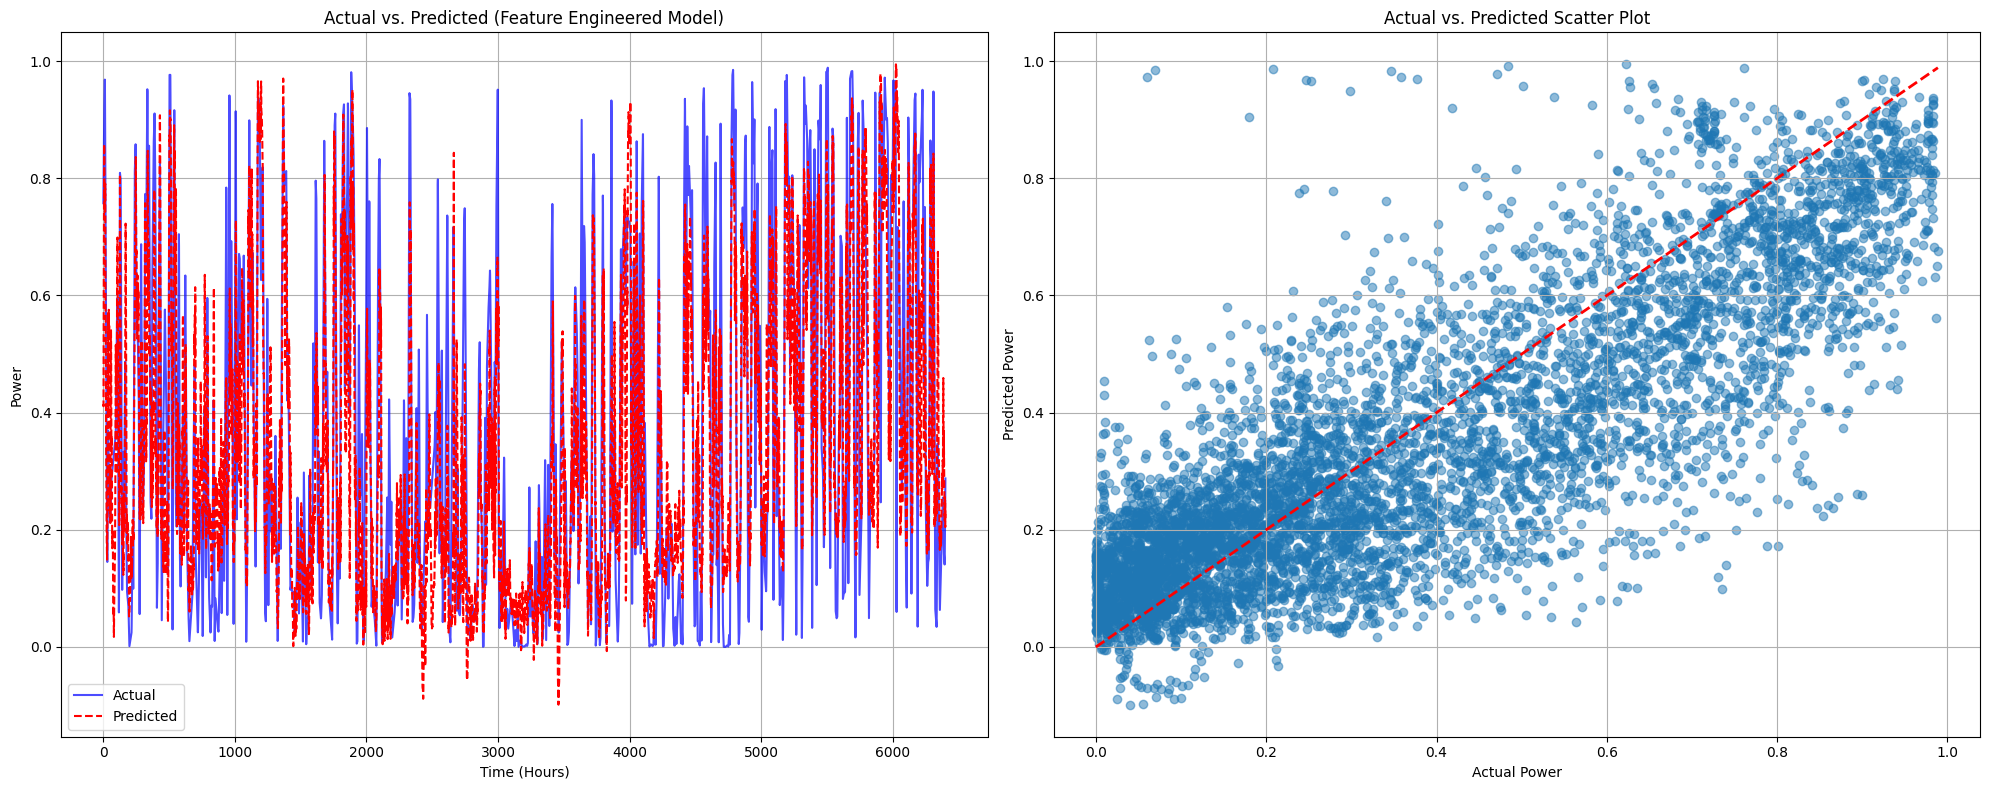

In [8]:
import time
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1. 모델 학습 ---
NUM_EPOCHS = 50
PATIENCE = 10
best_val_loss = float('inf')
early_stopping_counter = 0
best_model_path_fe = 'best_model_fe.pth' # 새 모델 파일 이름

print("--- 특성 공학 모델 학습 시작 ---")
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    model_fe.train()
    train_loss = 0.0
    train_iterator = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]")
    for inputs, labels in train_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_fe(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_iterator.set_postfix({'loss': loss.item()})
    
    avg_train_loss = train_loss / len(train_loader)

    model_fe.eval()
    val_loss = 0.0
    with torch.no_grad():
        val_iterator = tqdm(val_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Val]")
        for inputs, labels in val_iterator:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_fe(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()
            val_iterator.set_postfix({'loss': loss.item()})
    
    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model_fe.state_dict(), best_model_path_fe)
        early_stopping_counter = 0
        print(f"Validation loss improved. Saving model to {best_model_path_fe}")
    else:
        early_stopping_counter += 1
        print(f"Validation loss did not improve. Counter: {early_stopping_counter}/{PATIENCE}")
    
    if early_stopping_counter >= PATIENCE:
        print("Early stopping triggered.")
        break

end_time = time.time()
print(f"\n--- 학습 종료 ---")
print(f"총 학습 시간: {end_time - start_time:.2f}초")

# --- 2. 최종 평가 ---
# 가장 성능이 좋았던 모델의 가중치를 불러옵니다.
model_fe.load_state_dict(torch.load(best_model_path_fe))
print(f"최적 모델 '{best_model_path_fe}' 로드 완료.")

model_fe.eval()
all_predictions = []
all_actuals = []
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="[Final Test]"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_fe(inputs)
        all_predictions.append(outputs.squeeze().cpu().numpy())
        all_actuals.append(labels.cpu().numpy())

predictions = np.concatenate(all_predictions)
actuals = np.concatenate(all_actuals)

# 성능 지표 계산
mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
r2 = r2_score(actuals, predictions)

print("\n--- 특성 공학 모델 최종 성능 평가 결과 ---")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared (결정 계수): {r2:.4f}")

# 결과 시각화
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(actuals, label='Actual', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs. Predicted (Feature Engineered Model)')
plt.xlabel('Time (Hours)')
plt.ylabel('Power')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Scatter Plot')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# =================================================================
# [Final Experiment] 선택적 특성 공학 (Selective Feature Engineering) - 수정된 버전
# =================================================================
import pandas as pd
import numpy as np

# --- 1. 데이터 불러오기 및 핵심 특성만 추가 ---
df = pd.read_csv('Location1.csv')
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df.rename(columns={'Power': 'target'}, inplace=True)

df['hour_sin'] = np.sin(2 * np.pi * df.index.hour/24.0)
df['hour_cos'] = np.cos(2 * np.pi * df.index.hour/24.0)

print("--- '선택적 특성 공학' 적용 후 데이터 정보 ---")
print(df.info(verbose=False))

# --- 이후 과정은 위에서 실행했던 코드와 거의 동일합니다 ---
# --- 전체 코드를 다시 한번 제공해 드립니다. 이 셀 하나만 실행하시면 됩니다. ---

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

# --- 2. 분할, 스케일링, 시퀀스 생성 ---
features = [col for col in df.columns if col != 'target']
n = len(df)
train_end = int(n * 0.7)
val_end = int(n * (0.7 + 0.15))
train_df = df.iloc[:train_end].copy()
val_df = df.iloc[train_end:val_end].copy()
test_df = df.iloc[val_end:].copy()

scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
val_df[features] = scaler.transform(val_df[features])
test_df[features] = scaler.transform(test_df[features])

def create_sequences(input_data, sequence_length, prediction_horizon):
    X, y = [], []
    features = [col for col in input_data.columns if col != 'target']
    for i in range(len(input_data) - sequence_length - prediction_horizon + 1):
        X.append(input_data[features].iloc[i:(i + sequence_length)].values)
        y.append(input_data['target'].iloc[i + sequence_length + prediction_horizon - 1])
    return np.array(X), np.array(y)

SEQUENCE_LENGTH = 24 * 7
PREDICTION_HORIZON = 1
X_train, y_train = create_sequences(train_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)
X_val, y_val = create_sequences(val_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)
X_test, y_test = create_sequences(test_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)

# --- 3. PyTorch 데이터로더 및 모델 준비 ---
BATCH_SIZE = 64
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = X_train.shape[2]
HIDDEN_SIZE = 256
NUM_LAYERS = 3
OUTPUT_SIZE = 1
LEARNING_RATE = 0.001

# ==========================================================
# !! 오류 수정 !! : LSTMModel 클래스 정의 수정
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        # 아래 두 줄이 누락되어 있었습니다. 다시 추가합니다.
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out
# ==========================================================

model_selective = LSTMModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_selective.parameters(), lr=LEARNING_RATE)

# --- 4. 학습 및 평가 ---
print(f"\n--- 최종 실험: 입력 Feature 수 {INPUT_SIZE}개로 학습 시작 ---")
NUM_EPOCHS = 50
PATIENCE = 5
best_val_loss = float('inf')
early_stopping_counter = 0
best_model_path_selective = 'best_model_selective.pth'

# 학습 진행률 바(tqdm)를 사용하기 위해 루프를 다시 구성합니다.
for epoch in range(NUM_EPOCHS):
    model_selective.train()
    train_loss = 0.0
    train_iterator = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]")
    for inputs, labels in train_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_selective(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_iterator.set_postfix({'loss': loss.item()})
    
    avg_train_loss = train_loss / len(train_loader)
    
    model_selective.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_selective(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")
    
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model_selective.state_dict(), best_model_path_selective)
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
    
    if early_stopping_counter >= PATIENCE:
        print("Early stopping triggered.")
        break

print(f"\n--- 학습 완료 ---")
model_selective.load_state_dict(torch.load(best_model_path_selective))
model_selective.eval()
all_predictions, all_actuals = [], []
with torch.no_grad():
    test_iterator = tqdm(test_loader, desc="[Final Test]")
    for inputs, labels in test_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_selective(inputs)
        all_predictions.append(outputs.squeeze().cpu().numpy())
        all_actuals.append(labels.cpu().numpy())

predictions = np.concatenate(all_predictions)
actuals = np.concatenate(all_actuals)
r2 = r2_score(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))

print(f"\n--- '선택적 특성 공학' 모델 최종 성능 ---")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared (결정 계수): {r2:.4f}")

--- '선택적 특성 공학' 적용 후 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2017-01-02 00:00:00 to 2021-12-31 23:00:00
Columns: 11 entries, temperature_2m to hour_cos
dtypes: float64(8), int64(3)
memory usage: 4.0 MB
None

--- 최종 실험: 입력 Feature 수 10개로 학습 시작 ---


Epoch 1/50 [Train]: 100%|██████████| 477/477 [00:15<00:00, 31.15it/s, loss=0.0186]


Epoch 1/50 | Train Loss: 0.029567 | Val Loss: 0.028217


Epoch 2/50 [Train]: 100%|██████████| 477/477 [00:14<00:00, 32.05it/s, loss=0.0478]


Epoch 2/50 | Train Loss: 0.024888 | Val Loss: 0.030528


Epoch 3/50 [Train]: 100%|██████████| 477/477 [00:15<00:00, 31.08it/s, loss=0.0247]


Epoch 3/50 | Train Loss: 0.023673 | Val Loss: 0.027228


Epoch 4/50 [Train]: 100%|██████████| 477/477 [00:25<00:00, 18.42it/s, loss=0.0127]


Epoch 4/50 | Train Loss: 0.022430 | Val Loss: 0.025396


Epoch 5/50 [Train]: 100%|██████████| 477/477 [00:33<00:00, 14.23it/s, loss=0.0131]


Epoch 5/50 | Train Loss: 0.020857 | Val Loss: 0.029911


Epoch 6/50 [Train]: 100%|██████████| 477/477 [00:39<00:00, 12.08it/s, loss=0.00959]


Epoch 6/50 | Train Loss: 0.017704 | Val Loss: 0.029131


Epoch 7/50 [Train]: 100%|██████████| 477/477 [00:42<00:00, 11.16it/s, loss=0.0249] 


Epoch 7/50 | Train Loss: 0.014342 | Val Loss: 0.032337


Epoch 8/50 [Train]: 100%|██████████| 477/477 [00:49<00:00,  9.60it/s, loss=0.0118] 


Epoch 8/50 | Train Loss: 0.011298 | Val Loss: 0.033695


Epoch 9/50 [Train]: 100%|██████████| 477/477 [00:48<00:00,  9.78it/s, loss=0.00826]


Epoch 9/50 | Train Loss: 0.008277 | Val Loss: 0.035343
Early stopping triggered.

--- 학습 완료 ---


[Final Test]: 100%|██████████| 101/101 [00:04<00:00, 23.50it/s]


--- '선택적 특성 공학' 모델 최종 성능 ---
MAE: 0.1153
RMSE: 0.1511
R-squared (결정 계수): 0.7236
